In [1]:
import main
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from finance_model import ChartOfAccounts

In [2]:
tb, accounts = main.read_all_trial_balances()

Finance model:
year = 2017
year: month = 2017 - jan
adding: [11040] PNC Operating, debit, bs
adding: [11050] PNC Payroll, debit, bs
adding: [11100] Wells Fargo Bank, debit, bs
adding: [11500] Cash on Hand, Petty Cash, debit, bs
adding: [12000] Accounts Receivable, debit, bs
adding: [14700] Furniture & Fixtures, debit, bs
adding: [15000] Machinery & Equipment, debit, bs
adding: [15200] Building, debit, bs
adding: [15700] Vehicles, debit, bs
adding: [16000] Accumulated Depreciation, credit, bs
adding: [17500] Prepaid Expenses, debit, bs
adding: [19200] Intangible Assets, debit, bs
adding: [19500] Accumulated Amortization, credit, bs
adding: [20000] Accounts Payable, credit, bs
adding: [20020] Accrued Accounts Payable, credit, bs
adding: [20300] Accrued Bonus Payable, credit, bs
adding: [20400] Notes Payable 2014 Infiniti JX, credit, bs
adding: [20500] Notes Payable Nat. Coop Bank, credit, bs
adding: [20700] Notes Payable  2014 Transit, credit, bs
adding: [20750] Wells Fargo Line of Credi

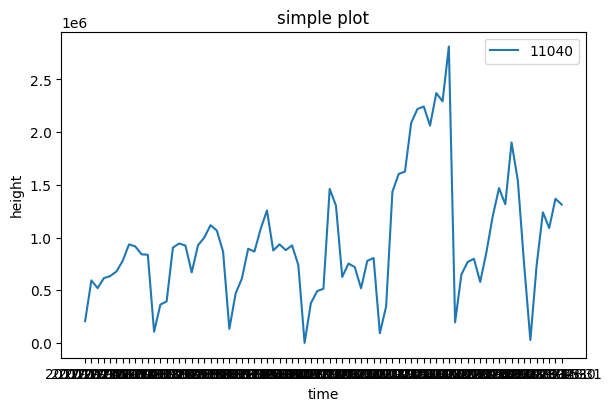

In [3]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')

x = np.linspace(0, 2, 100)
ax.plot(tb.index, tb[11040], label='11040')
# ax.plot(x, x**2, label = 'quadradic')
ax.set_xlabel("time")
ax.set_ylabel("height")
ax.set_title('simple plot')
ax.legend()

In [4]:
tb[11040]

2017-01-31     206481.42
2017-02-28     593226.37
2017-03-31     519427.85
2017-04-30     614920.67
2017-05-31     634201.97
                 ...    
2023-01-31     737289.83
2023-02-28    1238993.67
2023-03-31    1089580.81
2023-04-30    1367670.96
2023-05-31    1312552.22
Name: 11040, Length: 77, dtype: float64

In [11]:
val = tb.columns[30]


In [12]:
map = accounts.account_mapping

In [13]:
j = map[val < map['low']]

In [14]:
j.iloc[0,0]

27000

In [15]:
accounts.account_mapping

,low,high,bs_is,category,sub_category,sub_account
0,11000,11599,bs,assets,current assets,cash and equivelents
1,11600,13000,bs,assets,current assets,accounts receivable
2,14700,16000,bs,assets,property and equiptment,NaN
3,17500,19999,bs,assets,other assets,NaN
4,20000,20200,bs,Liabilities,current liabilities,accounts payable
5,20300,20399,bs,Liabilities,current liabilities,accrued expenses
6,20400,20999,bs,Liabilities,current liabilities,other
7,21000,21999,bs,Liabilities,long term liabilities,Accrued Expenses
8,22000,24999,bs,Liabilities,long term liabilities,Other
9,27000,28999,bs,equity,NaN,NaN


In [35]:
import calendar

print(calendar.month_name)
for i in calendar.month_name:
    print (i)


January
February
March
April
May
June
July
August
September
October
November
December


In [42]:
[i for i in range(2017, 2024)]

[2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [18]:
a = pd.Series([1, 2, 3, 4])


In [19]:
a

0    1
1    2
2    3
3    4
dtype: int64

In [20]:
b = pd.Series([4, 3, 2, 1])

In [21]:
b

0    4
1    3
2    2
3    1
dtype: int64

In [22]:
a + b

0    5
1    5
2    5
3    5
dtype: int64

In [23]:
sum([a,b])

0    5
1    5
2    5
3    5
dtype: int64

In [24]:
import numpy as np
row_list= []
for i in range (0,5):
    row_list.append(dict( (a,np.random.randint(100)) for a in ['A','B','C','D','E']))
row_list

[{'A': 13, 'B': 80, 'C': 14, 'D': 31, 'E': 71},
 {'A': 22, 'B': 27, 'C': 36, 'D': 13, 'E': 56},
 {'A': 5, 'B': 91, 'C': 35, 'D': 30, 'E': 9},
 {'A': 51, 'B': 84, 'C': 33, 'D': 57, 'E': 66},
 {'A': 30, 'B': 39, 'C': 68, 'D': 17, 'E': 57}]

In [25]:
df = pd.DataFrame(row_list)
cols = df.columns.tolist()
cols.sort(reverse=True)
cols

['E', 'D', 'C', 'B', 'A']

In [26]:
tdf = pd.DataFrame(row_list).set_index('A')


In [27]:
tdf.to_dict(orient='records', index=True)

[{'B': 80, 'C': 14, 'D': 31, 'E': 71},
 {'B': 27, 'C': 36, 'D': 13, 'E': 56},
 {'B': 91, 'C': 35, 'D': 30, 'E': 9},
 {'B': 84, 'C': 33, 'D': 57, 'E': 66},
 {'B': 39, 'C': 68, 'D': 17, 'E': 57}]

In [28]:
tdf.to_dict('index')

{13: {'B': 80, 'C': 14, 'D': 31, 'E': 71},
 22: {'B': 27, 'C': 36, 'D': 13, 'E': 56},
 5: {'B': 91, 'C': 35, 'D': 30, 'E': 9},
 51: {'B': 84, 'C': 33, 'D': 57, 'E': 66},
 30: {'B': 39, 'C': 68, 'D': 17, 'E': 57}}

In [29]:
df['total']=0

In [30]:
df.iloc[0]

A        13
B        80
C        14
D        31
E        71
total     0
Name: 0, dtype: int64

In [31]:
df[df.columns].sum()

A        121
B        321
C        186
D        148
E        259
total      0
dtype: int64